In [1]:
import keras

import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

# Setup

I decided to copy everything over to a new notebook, otherwise the original notebook would become too long. 

Below, I just set everything up in the same way as the `keras-mnist` notebook.

## Load and format the data

Load the MNIST data for training and for testing:

In [2]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


Normalize and reshape the input data:

In [3]:
# normalize data 
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

# reshape - flatten the 28x28 arrays
X_train = np.reshape(X_train, (60000, 784))
X_test = np.reshape(X_test, (10000, 784))

Convert the output to an array, matching the output of a neural network:

In [4]:
from keras.utils import np_utils

y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

## Build the Neural Network

This is the step we'll be playing with for the assignment, but let's build and run the original. As a reminder,

> We will have 2 hidden layers, and the number of neurons will look like:
>
> 784 &rarr; 500 &rarr; 300 &rarr; 10
>
>- 784 = number of input
>- 10 = number of output
>- two hidden layers between to reduce numbers in steps

In [5]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import RMSprop

model = Sequential()                 # using a sequential NN model - b/c we have vectors
model.add(Dense(500, input_dim=784)) # add a dense layer that should have output of size 500 w/ input of size 784
model.add(Activation('relu'))        # non-linear activation function (see notes above) -  this is a hyper param
model.add(Dropout(0.4))              # 0.4% of layers not activated (see above)- hyper param
model.add(Dense(300))                # add dense layer with 300 for output - it knows input size from prev layer
model.add(Activation('relu'))        # same as above
model.add(Dropout(0.4))              # same as above
model.add(Dense(10))                 # last layer - output array w/ 10 elements
model.add(Activation('softmax'))     # see notes above - use different actiivation func for last layer to return probabilities

Choose a loss function, and an optimizer to minimize it. Here we use the `RMSprop` optimizer to minimize a "cross-entropy" loss function. We will use the accuracy of the model as our metric.

In [6]:
# build a model using the minimum requirements:
rms = RMSprop() # optimizer - want to minimize the loss function
model.compile(loss='categorical_crossentropy', # loss function to use
              optimizer=rms, metrics=['accuracy']) # metric: how well is it doing? want acc -> 100% 
                                                   #(acc = proportion of correct guessing the NN makes, as more data is passed)

Now we will train the model using the training data. We will train for 20 epochs, using a batch size of 256.

In [7]:
epochs = 20     
batch_size = 256 
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
          validation_data=(X_test, y_test), verbose=2)

Epoch 1/20
235/235 - 6s - loss: 0.3565 - accuracy: 0.8907 - val_loss: 0.1557 - val_accuracy: 0.9517
Epoch 2/20
235/235 - 5s - loss: 0.1538 - accuracy: 0.9540 - val_loss: 0.0973 - val_accuracy: 0.9715
Epoch 3/20
235/235 - 5s - loss: 0.1149 - accuracy: 0.9652 - val_loss: 0.0858 - val_accuracy: 0.9725
Epoch 4/20
235/235 - 5s - loss: 0.0937 - accuracy: 0.9716 - val_loss: 0.0816 - val_accuracy: 0.9755
Epoch 5/20
235/235 - 5s - loss: 0.0821 - accuracy: 0.9753 - val_loss: 0.0846 - val_accuracy: 0.9759
Epoch 6/20
235/235 - 5s - loss: 0.0700 - accuracy: 0.9789 - val_loss: 0.0729 - val_accuracy: 0.9795
Epoch 7/20
235/235 - 5s - loss: 0.0628 - accuracy: 0.9803 - val_loss: 0.0676 - val_accuracy: 0.9814
Epoch 8/20
235/235 - 5s - loss: 0.0580 - accuracy: 0.9822 - val_loss: 0.0684 - val_accuracy: 0.9815
Epoch 9/20
235/235 - 5s - loss: 0.0553 - accuracy: 0.9833 - val_loss: 0.0710 - val_accuracy: 0.9815
Epoch 10/20
235/235 - 5s - loss: 0.0490 - accuracy: 0.9844 - val_loss: 0.0693 - val_accuracy: 0.9824

Finally, let's test it on a small subset of the testing data.

- note, from the numpy docs for `argmax()`: "Returns the indices of the maximum values along an axis."

test 0: success: prediction = 7, truth is 7


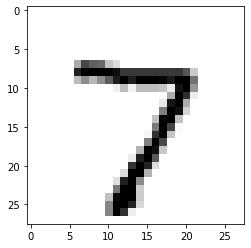

test 1: success: prediction = 2, truth is 2


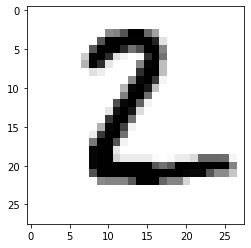

test 2: success: prediction = 1, truth is 1


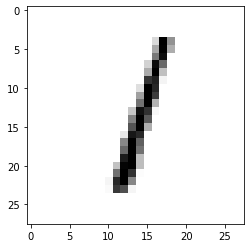

test 3: success: prediction = 0, truth is 0


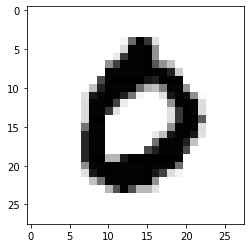

test 4: success: prediction = 4, truth is 4


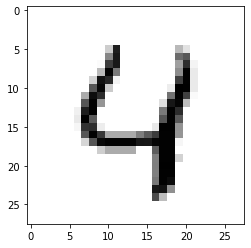

In [11]:
N_test = 5
for n, (x, y) in enumerate(zip(X_test[:N_test], y_test[:N_test])):
    try:
        res = model.predict(np.array([x]), verbose=0)
        prediction = np.argmax(res)
        truth = np.argmax(y)
        if prediction != truth:
          status = "failure"
        else:
          status = "success"
        print("test {}: {}: prediction = {}, truth is {}".format(n, status, prediction, truth))
        plt.imshow(x.reshape(28, 28), cmap="gray_r")
        plt.show()
    except KeyboardInterrupt:
        print("stopping")
        break

---

# Exercises

To avoid repeating the same set of code each time, define a function to build a model:

In [23]:
rms = RMSprop()

def build_model(n_hidden=2, hidden_output_sizes=[500,300], activation_func='relu', 
                dropout=0.4, loss_func='categorical_crossentropy',
                optimizer=rms, metrics=['accuracy']):
    """Build a sequential neural network for the MNIST data.

    Parameters
    ----------
    n_hidden : integer, default=2
        The number of hidden layers to use. 
    hidden_output_sizes : array_like, default=[500,300]
        Contains the integer size of the output of each hidden layer. 
        Must have a length equal to `n_hidden`.
    activation_func : str, default='relu'
        The activation function to use for each hidden layer.
    dropout : float, default=0.4
        The percentage (not fraction) of neurons ignored in each hidden layer.
    loss_func : str, default='categorical_crossentropy'
        The loss function to use.
    optimizer : a `keras.optimizers` object, default=keras.optimizers.RMSprop
        The optimizer to use.
    metrics : array_like, default=['accuracy']
        A list of metrics to use to evaluate the model while training. 
    
    Returns
    -------
    model : `keras.models.Sequential` object
        The model for the sequential neural network.
    """
    input_dim  = 784 # size of each input array
    output_dim = 10 # size of each output array

    model = Sequential()  # using a sequential NN model  
    
    # check if we have any hidden layers.
    if n_hidden > 0: # if we have hidden layers, add them
        for i, layer_output_dim in enumerate(hidden_output_sizes):
            if i==0: # need to specify input dimension
                model.add(Dense(layer_output_dim, input_dim=input_dim))
            else:    # just add another layer
                model.add(Dense(layer_output_dim))
            model.add(Activation(activation_func)) # apply the activation func
            model.add(Dropout(dropout))            # do the dropoout
        model.add(Dense(output_dim))               # add the last layer

    elif n_hidden == 0: # just add the output later
        model.add(Dense(output_dim, input_dim=input_dim))

    else:               # something isn't right
        raise(ValueError("`n_hidden` must be zero or a positive integer."))

    model.add(Activation('softmax')) # use softmax activation for the last layer

    # choose the optimizer and loss function
    model.compile(loss=loss_func, optimizer=optimizer, metrics=metrics) 

    return model

Define a function to train the model, using the training data:

In [33]:
def train_model(model, batch_size=256, epochs=20):
    """Train the neural network using the training data.

    Parameters
    ----------
    model : `keras.models.Sequential` object
        The model to train.
    batch_size : integer, default=256
        The batch_size to use for training.
    epochs : integer, default=20
        The number of epochs to train.

    Returns
    -------
    hist : a `tf.keras.callbacks.History` object
        A `keras.callbacks.Callback` instance, applied during training.
        `hist.history` stores a record of the training at each epoch.
    """
    hist = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
            validation_data=(X_test, y_test), verbose=2)
    return hist

---

## Q1: Batch size

Adjust the batch size&mdash;how does this affect the time it takes to train for an epoch?

---

### Q1: my solution

Choose a few different batch sizes. Generate a model and train it using a new batch size for each. Time how long the training takes.

In [25]:
import time

batch_sizes = [98, 196, 392, 784] # 784 divided by 8, 4, 2, 1
times = []

for batch_size in batch_sizes:
    # build the model in the same way as we did above
    model = build_model() 
    # train the model using this batch size
    print("\n batch size = ", batch_size) 
    start = time.time()
    train_model(model, batch_size=batch_size)
    end = time.time()
    times.append(end - start)


 batch size =  98
Epoch 1/20
613/613 - 8s - loss: 0.2963 - accuracy: 0.9089 - val_loss: 0.1227 - val_accuracy: 0.9632
Epoch 2/20
613/613 - 7s - loss: 0.1423 - accuracy: 0.9584 - val_loss: 0.0906 - val_accuracy: 0.9719
Epoch 3/20
613/613 - 7s - loss: 0.1157 - accuracy: 0.9676 - val_loss: 0.0816 - val_accuracy: 0.9769
Epoch 4/20
613/613 - 7s - loss: 0.0993 - accuracy: 0.9722 - val_loss: 0.0864 - val_accuracy: 0.9776
Epoch 5/20
613/613 - 7s - loss: 0.0923 - accuracy: 0.9744 - val_loss: 0.0789 - val_accuracy: 0.9793
Epoch 6/20
613/613 - 7s - loss: 0.0810 - accuracy: 0.9776 - val_loss: 0.0858 - val_accuracy: 0.9783
Epoch 7/20
613/613 - 7s - loss: 0.0773 - accuracy: 0.9785 - val_loss: 0.0951 - val_accuracy: 0.9794
Epoch 8/20
613/613 - 7s - loss: 0.0762 - accuracy: 0.9805 - val_loss: 0.0932 - val_accuracy: 0.9797
Epoch 9/20
613/613 - 7s - loss: 0.0751 - accuracy: 0.9805 - val_loss: 0.0885 - val_accuracy: 0.9819
Epoch 10/20
613/613 - 7s - loss: 0.0696 - accuracy: 0.9818 - val_loss: 0.0935 - v

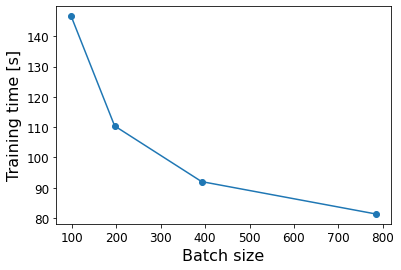

In [27]:
# plot the training time as a function of the batch size
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(batch_sizes, times, 'o-')
ax.set_xlabel("Batch size", fontsize=16)
ax.set_ylabel("Training time [s]", fontsize=16)
ax.tick_params(axis='both', labelsize=12)
plt.show()


We can see that smaller batch sizes take longer and lead to lower accuracy.

---

## Q2: Hidden layers

Remove one of the hidden layers&mdash;how does the accuracy change?

---

### Q2: my solution

Keeping everything else fixed to their default values, test using only one hidden layer, compared to the original two.

In [29]:
# default model with 2 hidden layers
model = build_model()
train_model(model)

Epoch 1/20
235/235 - 6s - loss: 0.3620 - accuracy: 0.8890 - val_loss: 0.1387 - val_accuracy: 0.9560
Epoch 2/20
235/235 - 5s - loss: 0.1537 - accuracy: 0.9538 - val_loss: 0.0997 - val_accuracy: 0.9694
Epoch 3/20
235/235 - 5s - loss: 0.1144 - accuracy: 0.9652 - val_loss: 0.0781 - val_accuracy: 0.9766
Epoch 4/20
235/235 - 5s - loss: 0.0935 - accuracy: 0.9718 - val_loss: 0.0754 - val_accuracy: 0.9772
Epoch 5/20
235/235 - 5s - loss: 0.0821 - accuracy: 0.9750 - val_loss: 0.0690 - val_accuracy: 0.9798
Epoch 6/20
235/235 - 5s - loss: 0.0719 - accuracy: 0.9776 - val_loss: 0.0712 - val_accuracy: 0.9808
Epoch 7/20
235/235 - 5s - loss: 0.0642 - accuracy: 0.9804 - val_loss: 0.0699 - val_accuracy: 0.9804
Epoch 8/20
235/235 - 5s - loss: 0.0577 - accuracy: 0.9827 - val_loss: 0.0656 - val_accuracy: 0.9817
Epoch 9/20
235/235 - 5s - loss: 0.0537 - accuracy: 0.9830 - val_loss: 0.0667 - val_accuracy: 0.9833
Epoch 10/20
235/235 - 5s - loss: 0.0483 - accuracy: 0.9852 - val_loss: 0.0731 - val_accuracy: 0.9819

In [30]:
# create a model with only one hidden layer, with an output size of 500 
model = build_model(n_hidden=1, hidden_output_sizes=[500])
train_model(model)

Epoch 1/20
235/235 - 4s - loss: 0.3535 - accuracy: 0.8970 - val_loss: 0.1639 - val_accuracy: 0.9508
Epoch 2/20
235/235 - 4s - loss: 0.1611 - accuracy: 0.9524 - val_loss: 0.1162 - val_accuracy: 0.9654
Epoch 3/20
235/235 - 4s - loss: 0.1175 - accuracy: 0.9659 - val_loss: 0.0945 - val_accuracy: 0.9715
Epoch 4/20
235/235 - 4s - loss: 0.0934 - accuracy: 0.9724 - val_loss: 0.0786 - val_accuracy: 0.9747
Epoch 5/20
235/235 - 4s - loss: 0.0795 - accuracy: 0.9757 - val_loss: 0.0759 - val_accuracy: 0.9770
Epoch 6/20
235/235 - 4s - loss: 0.0680 - accuracy: 0.9787 - val_loss: 0.0681 - val_accuracy: 0.9793
Epoch 7/20
235/235 - 4s - loss: 0.0607 - accuracy: 0.9818 - val_loss: 0.0659 - val_accuracy: 0.9796
Epoch 8/20
235/235 - 4s - loss: 0.0545 - accuracy: 0.9836 - val_loss: 0.0666 - val_accuracy: 0.9795
Epoch 9/20
235/235 - 4s - loss: 0.0479 - accuracy: 0.9854 - val_loss: 0.0616 - val_accuracy: 0.9808
Epoch 10/20
235/235 - 4s - loss: 0.0432 - accuracy: 0.9863 - val_loss: 0.0595 - val_accuracy: 0.9822

We can see that removing a hidden layer didn't really change much : for epoch 20/20, 

| Hidden layers | `loss`  | `accuracy` | `val_loss`  | `val_accuracy` |
|---|---|---|---|---|
| 2 |  0.0304 | 0.9907 | 0.0868 | 0.9845 |
| 1 | 0.0207 | 0.9932 | 0.0649 | 0.9839 |

---

## Q3: Dropout

What happens to the accuracy if you don't include any dropouts?

---

### Q3: my solution

In [31]:
# train a model with no dropout
model = build_model(dropout=0.)
train_model(model)

Epoch 1/20
235/235 - 6s - loss: 0.2780 - accuracy: 0.9136 - val_loss: 0.1578 - val_accuracy: 0.9493
Epoch 2/20
235/235 - 5s - loss: 0.0976 - accuracy: 0.9700 - val_loss: 0.0814 - val_accuracy: 0.9742
Epoch 3/20
235/235 - 5s - loss: 0.0613 - accuracy: 0.9811 - val_loss: 0.1467 - val_accuracy: 0.9542
Epoch 4/20
235/235 - 5s - loss: 0.0421 - accuracy: 0.9870 - val_loss: 0.0761 - val_accuracy: 0.9763
Epoch 5/20
235/235 - 5s - loss: 0.0310 - accuracy: 0.9902 - val_loss: 0.0822 - val_accuracy: 0.9750
Epoch 6/20
235/235 - 5s - loss: 0.0224 - accuracy: 0.9926 - val_loss: 0.0745 - val_accuracy: 0.9812
Epoch 7/20
235/235 - 5s - loss: 0.0163 - accuracy: 0.9947 - val_loss: 0.0890 - val_accuracy: 0.9801
Epoch 8/20
235/235 - 5s - loss: 0.0141 - accuracy: 0.9952 - val_loss: 0.0745 - val_accuracy: 0.9823
Epoch 9/20
235/235 - 5s - loss: 0.0111 - accuracy: 0.9962 - val_loss: 0.0880 - val_accuracy: 0.9801
Epoch 10/20
235/235 - 5s - loss: 0.0089 - accuracy: 0.9971 - val_loss: 0.0743 - val_accuracy: 0.9833

Here, for the last epoch, we can see that the accuracy is increased when the dropout is removed, but the validation accuracy is approximately the same.

| Dropout | `loss`  | `accuracy` | `val_loss`  | `val_accuracy` |
|---|---|---|---|---|
| 0.4 | 0.0304 | 0.9907 | 0.0868 | 0.9845 |
| 0.0 | 0.0033 | 0.9990 | 0.1258 | 0.9827 |

---

## Q4: Activation

How does the network perform using a `"sigmoid"` activation function?

---

### Q4: my solution

In [32]:
# train a model with no dropout
model = build_model(activation_func="sigmoid")
train_model(model)

Epoch 1/20
235/235 - 6s - loss: 0.7773 - accuracy: 0.7555 - val_loss: 0.3069 - val_accuracy: 0.9097
Epoch 2/20
235/235 - 5s - loss: 0.3296 - accuracy: 0.9004 - val_loss: 0.2340 - val_accuracy: 0.9285
Epoch 3/20
235/235 - 5s - loss: 0.2600 - accuracy: 0.9218 - val_loss: 0.1944 - val_accuracy: 0.9434
Epoch 4/20
235/235 - 5s - loss: 0.2151 - accuracy: 0.9348 - val_loss: 0.1589 - val_accuracy: 0.9507
Epoch 5/20
235/235 - 5s - loss: 0.1844 - accuracy: 0.9439 - val_loss: 0.1368 - val_accuracy: 0.9573
Epoch 6/20
235/235 - 5s - loss: 0.1613 - accuracy: 0.9523 - val_loss: 0.1223 - val_accuracy: 0.9641
Epoch 7/20
235/235 - 5s - loss: 0.1410 - accuracy: 0.9568 - val_loss: 0.1118 - val_accuracy: 0.9653
Epoch 8/20
235/235 - 5s - loss: 0.1287 - accuracy: 0.9603 - val_loss: 0.1002 - val_accuracy: 0.9688
Epoch 9/20
235/235 - 5s - loss: 0.1164 - accuracy: 0.9641 - val_loss: 0.0918 - val_accuracy: 0.9718
Epoch 10/20
235/235 - 5s - loss: 0.1063 - accuracy: 0.9682 - val_loss: 0.0905 - val_accuracy: 0.9707

Here, we can see that the accuracy has decreased.

| Activation function | `loss`  | `accuracy` | `val_loss`  | `val_accuracy` |
|---|---|---|---|---|
| rectified linear unit (`"relu"`) | 0.0304 | 0.9907 | 0.0868 | 0.9845 |
| sigmoid (`"sigmoid"`) | 0.0604 | 0.9811 | 0.0654 | 0.9799 |

---

## Q5: Callbacks

keras allows for callbacks each epoch to store some information.  Make a plot of the accuracy vs. epoch by adding a callback.  Take a look here for some inspiration:

https://keras.io/callbacks/#example-recording-loss-history

https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History

---

The `History` callback is automatically returned by the `fit()` function used to train the model. It is also the output of the function `train_model()` defined above.

In [34]:
model = build_model()
hist = train_model(model)

Epoch 1/20
235/235 - 6s - loss: 0.3592 - accuracy: 0.8904 - val_loss: 0.1389 - val_accuracy: 0.9567
Epoch 2/20
235/235 - 5s - loss: 0.1535 - accuracy: 0.9543 - val_loss: 0.1021 - val_accuracy: 0.9681
Epoch 3/20
235/235 - 5s - loss: 0.1134 - accuracy: 0.9661 - val_loss: 0.0880 - val_accuracy: 0.9722
Epoch 4/20
235/235 - 5s - loss: 0.0940 - accuracy: 0.9710 - val_loss: 0.0734 - val_accuracy: 0.9779
Epoch 5/20
235/235 - 5s - loss: 0.0795 - accuracy: 0.9759 - val_loss: 0.0793 - val_accuracy: 0.9761
Epoch 6/20
235/235 - 5s - loss: 0.0712 - accuracy: 0.9783 - val_loss: 0.0739 - val_accuracy: 0.9789
Epoch 7/20
235/235 - 5s - loss: 0.0639 - accuracy: 0.9809 - val_loss: 0.0746 - val_accuracy: 0.9801
Epoch 8/20
235/235 - 5s - loss: 0.0578 - accuracy: 0.9820 - val_loss: 0.0761 - val_accuracy: 0.9813
Epoch 9/20
235/235 - 5s - loss: 0.0562 - accuracy: 0.9828 - val_loss: 0.0787 - val_accuracy: 0.9806
Epoch 10/20
235/235 - 5s - loss: 0.0513 - accuracy: 0.9844 - val_loss: 0.0806 - val_accuracy: 0.9798

In [36]:
training_history = hist.history
type(training_history)

dict

In [40]:
for key in training_history.keys():
    print(key, type(training_history[key]), len(training_history[key]))

loss <class 'list'> 20
accuracy <class 'list'> 20
val_loss <class 'list'> 20
val_accuracy <class 'list'> 20


So we have a dictionary with keys for the loss and accuracy, and the values are lists with one entry per epoch.

Now we can get the list for the accuracy, and plot it against the number of epochs:

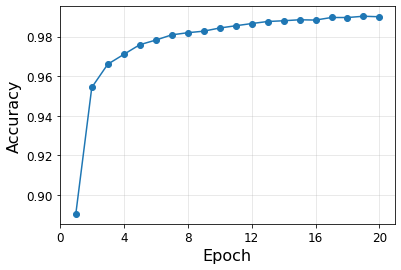

In [48]:
accuracy = training_history['accuracy']
epochs = range(1,21) # start counting at 1

# make the plot
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.plot(epochs, accuracy, 'o-')
ax.set_xlabel("Epoch", fontsize=16)
ax.set_ylabel("Accuracy", fontsize=16)
ax.tick_params(axis='both', labelsize=12)
ax.set_xticks(range(0,21,4))
ax.grid(alpha=0.35)

plt.show()